# Exercise notebook 12 - Pandas Data Analysis

This exercise notebook complements the notebook of **pandas data analysis**. <br> Use this [notebook](https://github.com/dtaantwerp/dtaantwerp.github.io/blob/53c91013df4514a943a9fad441fb5f28dc6f6bab/notebooks/14_W3_Wed_Pandas.ipynb) for a complete explanation of the theory.

Try to prepare the <ins>underlined exercises</ins> for the exercise session. 

===============================================================================

Before we can do anything we have to import pandas.

1. <ins> Import pandas.

In [1]:
#CODE HERE
import pandas as pd


2. <ins>Import the dataframe  311-service-requests.csv

In [3]:
#CODE HERE
df = pd.read_csv("311-service-requests.csv", dtype='unicode')
print(df.index)
#df.head(n = 10)

RangeIndex(start=0, stop=111069, step=1)


3. <ins> Now we'll do some prelimenary exploring:
    1.  print the first 5 rows.
    2. print the last 2 rows.
    3. check the shape of the df
    4. print the column names.
    5. check the datatypes of the columns.
    6. Check the general infor of the df.

In [ ]:
#CODE HERE for A

In [ ]:
#CODE HERE for B

In [ ]:
#CODE HERE for C

In [ ]:
#CODE HERE for D

In [ ]:
#CODE HERE for E

In [ ]:
#CODE HERE for F

4. <ins>Print the earliest and most recent date of the 'Created Date' column.


In [ ]:
#CODE HERE


5. <ins> Selecting columns
- Slice columns "Agency" and "Agency Name"
- Use .loc to select the columns "Agency" and "Agency Name"

In [ ]:
#CODE HERE
#df["Agency", "Agency Name"]

In [ ]:
#CODE HERE
df.loc[:, ["Agency", "Agency Name"]]

6. <ins>Selecting rows
    1. Slice the first 10 rows
    2. Use .iloc to select the first 10 rows
    3. Use .iloc to select the value in row 10, column 5
    4. Use boolean indexing to select rows for which "Agency" equals "NYPD"

In [ ]:
#CODE HERE for A
df[0:10]

In [ ]:
#CODE HERE for B
df.iloc[:10]

In [ ]:
#CODE HERE for C
df.iloc[10,5]

In [ ]:
#CODE HERE for D
df[df["Agency"] == "NYPD"]

7. `Apply()` is used to apply a function to each row or column of a pandas DataFrame or Series. It takes a function as an argument and applies it to every element of the DataFrame or Series. <ins>Use apply() and lambda to lowercase all agency names

In [ ]:
#CODE HERE
df["Agency Name"] = df["Agency Name"].apply(lambda x: x.lower())
#Check if it worked
df.head()

8. Remove the open cases from the dataframe. I.e. all the rows where 'Closed Date' is NaN.
- How many rows were removed?

In [ ]:
#CODE HERE
open_df = df.dropna(subset = ["Closed Date"])

In [ ]:
len(df) - len(open_df)

9. <ins>How many complaint types are there?
- How many complaints does the most common complaint type have?
- Plot a horizontal bar chart of the top 10 most common complaints.

In [ ]:
#CODE HERE

most_comp = df["Complaint Type"].value_counts()[:10]
most_comp.plot(kind = "barh");

10. <ins> dealing with duplicates
- Remove all duplicate rows from the complaints data frame (keep first)
- Remove all rows with duplicate agencies (keep last)
- Can you drop duplicate rows using the "inplace" argument?

In [ ]:
#CODE HERE
dedup = df.drop_duplicates(keep = "first")

dedup_agency = df.drop_duplicates(subset = "Agency", keep = "last")

df["Agency"].drop_duplicates(inplace = False)

11. Which Agency has dealt with the most noise complaints?

In [ ]:
#CODE HERE
test = df[df['Complaint Type'] == "Noise - Street/Sidewalk"] 
test2 = test.groupby("Agency").count

test2

In [ ]:
noise_compl = df[df["Complaint Type"].str.contains("Noise")]
noise_compl["Agency"].value_counts()

In [ ]:
print(noise_compl.groupby("Agency")["Complaint Type"].count())

12. Convert the Created Date and Closed Date column to dtype datetime. 

In [ ]:
#CODE HERE
df["Created Date"] = pd.to_datetime(df["Created Date"])
df.dtypes

13. Create a new column in which you store the weekday of the Created Date's complaint.

In [ ]:
#CODE HERE
df["Weekday"] = df["Created Date"].dt.weekday
df

In [ ]:
col_to_move = df.pop("Weekday")

#inster column with instert (liocation, col_nam, col_val)

df.insert(0, "Weekday",  col_to_move)
df.head()

14. Replace the values in the df so that the correct number corresponds to the correct weekday, i.e. 0 : Monday, 1: Tuesday...

In [ ]:
di = {0: "Monday", 1 : "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df["Weekday"] = df["Weekday"].replace({"Weekday" :di})

df.head()

In [ ]:
#CODE HERE
df["Weekday"] = df["Weekday"].replace({0: "Monday", 1 : "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

df.head()

15. Plot the weekdays. On which day of the week are the most complaints created?

In [ ]:
#CODE HERE
df["Weekday"].value_counts().plot(kind = "bar");

In [ ]:
custom_dict = {"Monday": 0, "Tuesday" :1, "Wednesday" :2, "Thursday" :3, "Friday": 4, "Saturday": 5, "Sunday": 6}

#df.sort_values(by=['Weekday'], key=lambda x: x.map(custom_dict))

df["Weekday"].value_counts().sort_values(key=lambda x: x.map(custom_dict))#.plot(kind = "bar");


In [14]:
import matplotlib.pyplot as plt

16. <ins>import matplotlib.pyplot as plt and plot a simple line chart based on the arrays below.

In [ ]:
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

#CODE HERE

plt.plot(x,y)

plt.show()



17. Create a plot where you plot the two arrays (y1 and y2) on the y-axis.
- Include a legend.

In [ ]:
x = [1, 2, 3, 4, 5]
y1 = [10, 8, 6, 4, 2]
y2 = [2, 4, 6, 8, 10]

#CODE HERE

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Line 1", "Line2"])

plt.show()

18. <ins> Create a scatter plot of the latitude and longitude column in the df.


In [16]:
#CODE HERE
df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])




In [ ]:
plt.scatter(df["Latitude"], df["Longitude"])

In [ ]:
df.plot.scatter("Longitude", "Latitude")

19. In which city are the most complaints recorded.
- Plot the top 5 cities.

<Axes: xlabel='City'>

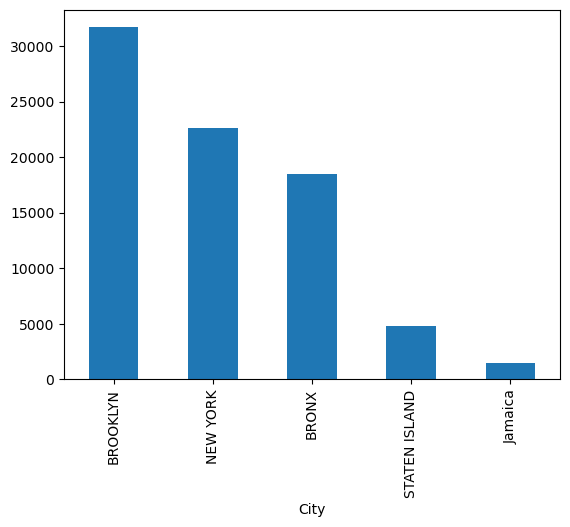

In [12]:
#CODE HERE
df.value_counts("City").head(5).plot(kind = "bar")

20. Plot the coordinates of all the complaints that were recorded in the Bronx.
- What happens if you add an argument 'alpha' and set it to 0.2 ?
- Add a title to your plot.

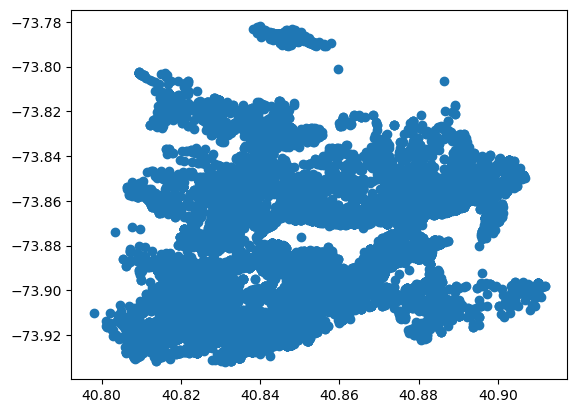

In [18]:
#CODE HERE
bronx = df[df['City'] == "BRONX"] 

plt.scatter(bronx["Latitude"], bronx["Longitude"])

Text(0.5, 1.0, 'Scatterplot of Complaints in the Bronx')

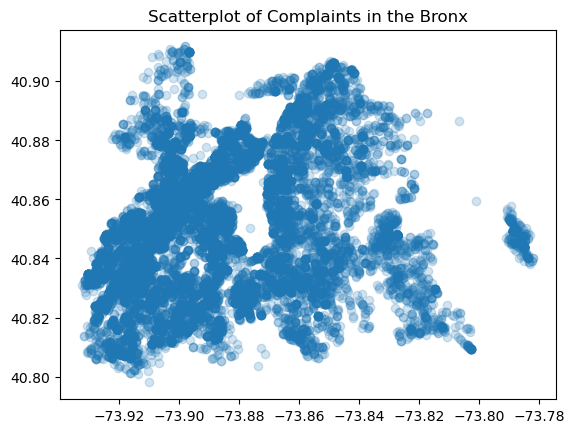

In [22]:
y = bronx["Latitude"]
x = bronx["Longitude"]
plt.scatter(x, y, alpha= 0.2)
plt.title("Scatterplot of Complaints in the Bronx")